# Task 1: Restaurant Reviews
    A. Analyze the text reviews to identify the most common positive and negative keywords.
    B. Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from collections import Counter


In [89]:
# Load the dataset into a DataFrame
df = pd.read_csv('/Users/sanskarsmacbook/Downloads/Dataset.csv')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Create empty lists to store positive and negative words
positive_words = []
negative_words = []

# Analyze each review and extract positive and negative keywords
for review in df['Rating text']:
    tokens = word_tokenize(review.lower())
    sentiment_scores = sia.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.2:
        positive_words.extend(tokens)
    elif sentiment_scores['compound'] <= -0.2:
        negative_words.extend(tokens)

# Calculate the most common positive and negative keywords
common_positive_keywords = Counter(positive_words).most_common(10)
common_negative_keywords = Counter(negative_words).most_common(10)

# Print the results
print("Most Common Positive Keywords:")
print(common_positive_keywords)

print("\nMost Common Negative Keywords:")
print(common_negative_keywords)


Most Common Positive Keywords:
[('good', 3179), ('very', 1079), ('excellent', 301)]

Most Common Negative Keywords:
[('poor', 186)]


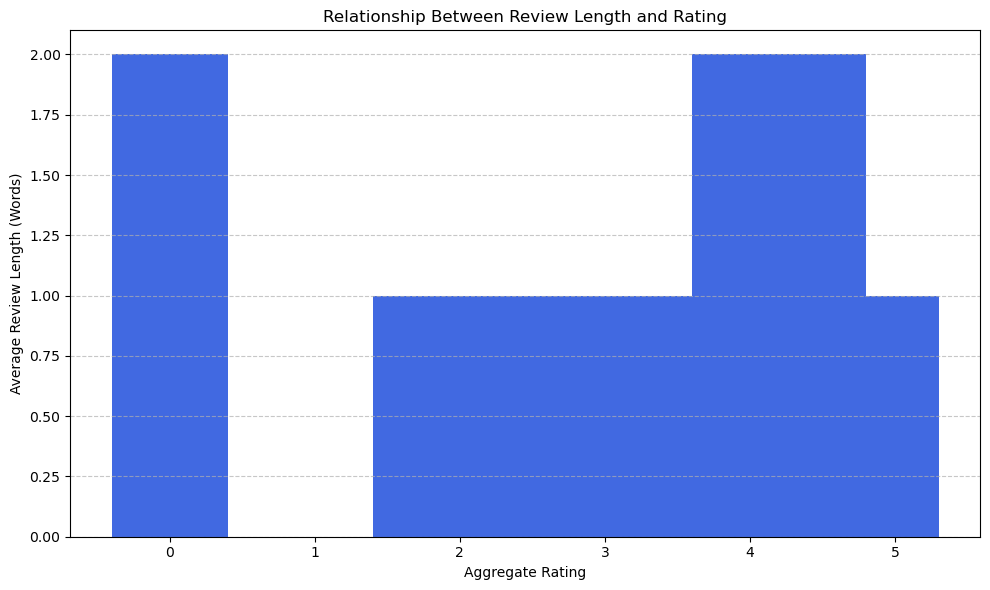

In [90]:
# Calculate the length of each review (number of words)
df['Review Length'] = df['Rating text'].apply(lambda x: len(x.split()))

# Group the data by rating and calculate the average review length for each rating
average_length_by_rating = df.groupby('Aggregate rating')['Review Length'].mean()

# Create a bar chart to visualize the relationship with rotated X-axis labels
plt.figure(figsize=(10, 6))
plt.bar(average_length_by_rating.index, average_length_by_rating.values, color='royalblue')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Review Length (Words)')
plt.title('Relationship Between Review Length and Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

plt.show()



# Task 2: Votes Analysis
    A. Identify the restaurants with the highest and lowest number of votes.
    B. Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [91]:
# Find the restaurant with the highest number of votes
highest_votes_restaurant = df[df['Votes'] == df['Votes'].max()]

# Find the restaurant with the lowest number of votes
lowest_votes_restaurant = df[df['Votes'] == df['Votes'].min()]

# Print the results
print("Restaurant with Highest Votes:")
print(highest_votes_restaurant[['Restaurant Name', 'Votes']])

print("\nRestaurant with Lowest Votes:")
print(lowest_votes_restaurant[['Restaurant Name', 'Votes']])


Restaurant with Highest Votes:
    Restaurant Name  Votes
728            Toit  10934

Restaurant with Lowest Votes:
                 Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


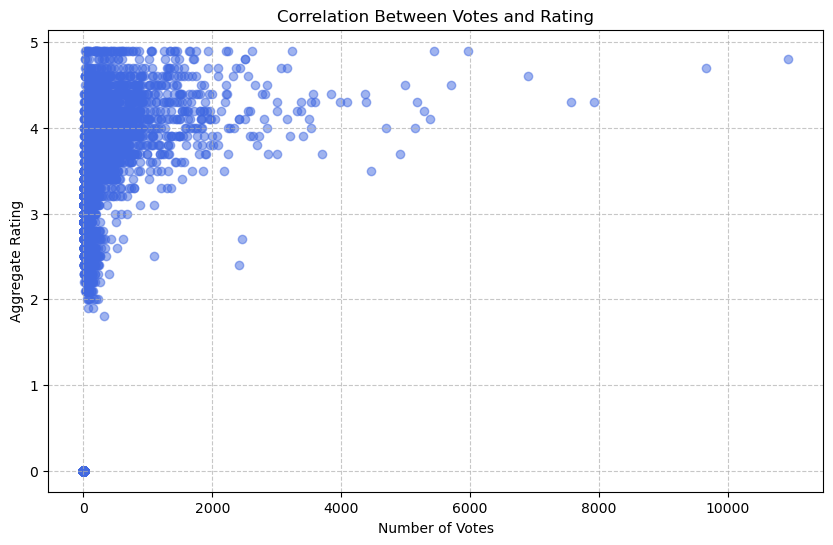


Correlation Between Number of Votes and Rating: 0.31369058419541146


In [92]:
# Create a scatter plot to analyze the correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['Votes'], df['Aggregate rating'], alpha=0.5, color='royalblue')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.title('Correlation Between Votes and Rating')
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Calculate the correlation between number of votes and rating
correlation = df['Votes'].corr(df['Aggregate rating'])

print("\nCorrelation Between Number of Votes and Rating:", correlation)

# Task 3: Price Range vs. Online Delivery and Table Booking
    A. Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
    B. Determine if higher-priced restaurants are more likely to offer these services.

In [93]:
# Create a contingency table to analyze the relationship
contingency_table = pd.crosstab(index=df['Price range'], columns=[df['Has Online delivery'], df['Has Table booking']], margins=True)

# Print the contingency table
print(contingency_table)


Has Online delivery    No        Yes        All
Has Table booking      No  Yes    No  Yes      
Price range                                    
1                    3743    0   700    1  4444
2                    1711  116  1163  123  3113
3                     624  373   140  271  1408
4                     299  234    13   40   586
All                  6377  723  2016  435  9551


In [96]:
# Calculate the average price range for restaurants offering online delivery and table booking
avg_price_range_with_delivery = df[df['Has Online delivery'] == 'Yes']['Price range'].mean()
avg_price_range_with_table_booking = df[df['Has Table booking'] == 'Yes']['Price range'].mean()

print("Average Price Range for Restaurants Offering Online Delivery:", avg_price_range_with_delivery)
print("Average Price Range for Restaurants Offering Table Booking:", avg_price_range_with_table_booking)


Average Price Range for Restaurants Offering Online Delivery: 1.9249286005711954
Average Price Range for Restaurants Offering Table Booking: 3.028497409326425
